In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ad_click_dataset.csv')
df.columns

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')

In [4]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [5]:
df = df.drop(columns=['id', 'full_name', 'ad_position'])

In [7]:
df.head()

,age,gender,device_type,browsing_history,time_of_day,click
0,22.0,NaN,Desktop,Shopping,Afternoon,1
1,NaN,Male,Desktop,NaN,NaN,1
2,41.0,Non-Binary,NaN,Education,Night,1
3,34.0,Male,NaN,Entertainment,Evening,1
4,39.0,Non-Binary,NaN,Social Media,Morning,0


In [8]:
# Create a DataFrame with 10000 rows
num_rows = 10000

# Define product categories
categories = [
    "Electronics",
    "Fashion and Apparel",
    "Home and Kitchen",
    "Beauty and Personal Care",
    "Health and Wellness",
    "Books and Stationery",
    "Toys and Games",
    "Automotive and Accessories",
    "Sports and Outdoor Gear",
    "Pet Supplies"
]

In [9]:
# Assign each category to exactly 1000 rows
category_distribution = categories * (num_rows // len(categories))

# Shuffle the categories
np.random.shuffle(category_distribution)

# Add categories to the DataFrame
df['Category'] = category_distribution

In [10]:
df.head()

,age,gender,device_type,browsing_history,time_of_day,click,Category
0,22.0,NaN,Desktop,Shopping,Afternoon,1,Health and Wellness
1,NaN,Male,Desktop,NaN,NaN,1,Automotive and Accessories
2,41.0,Non-Binary,NaN,Education,Night,1,Pet Supplies
3,34.0,Male,NaN,Entertainment,Evening,1,Health and Wellness
4,39.0,Non-Binary,NaN,Social Media,Morning,0,Automotive and Accessories


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               5234 non-null   float64
 1   gender            5307 non-null   object 
 2   device_type       8000 non-null   object 
 3   browsing_history  5218 non-null   object 
 4   time_of_day       8000 non-null   object 
 5   click             10000 non-null  int64  
 6   Category          10000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [12]:
df['gender'].value_counts()

gender
Female        1834
Male          1810
Non-Binary    1663
Name: count, dtype: int64

In [13]:
# Example: Imputing null values with diverse approaches
# Fill age with representative values based on distribution
age_values = [18, 25, 35, 45]
df['age'] = df['age'].apply(
    lambda x: np.random.choice(age_values, p=[0.25, 0.25, 0.25, 0.25]) if pd.isnull(x) else x
)

# Fill gender based on observed proportions
gender_distribution = df['gender'].value_counts(normalize=True)
df['gender'] = df['gender'].apply(
    lambda x: np.random.choice(gender_distribution.index, p=gender_distribution.values) if pd.isnull(x) else x
)

# Fill device_type based on observed proportions
device_distribution = df['device_type'].value_counts(normalize=True)
df['device_type'] = df['device_type'].apply(
    lambda x: np.random.choice(device_distribution.index, p=device_distribution.values) if pd.isnull(x) else x
)

# Fill browsing_history randomly from observed patterns
browsing_patterns = df['browsing_history'].dropna().unique()
df['browsing_history'] = df['browsing_history'].apply(
    lambda x: np.random.choice(browsing_patterns) if pd.isnull(x) else x
)

# Fill time_of_day based on observed proportions
time_distribution = df['time_of_day'].value_counts(normalize=True)
df['time_of_day'] = df['time_of_day'].apply(
    lambda x: np.random.choice(time_distribution.index, p=time_distribution.values) if pd.isnull(x) else x
)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   gender            10000 non-null  object 
 2   device_type       10000 non-null  object 
 3   browsing_history  10000 non-null  object 
 4   time_of_day       10000 non-null  object 
 5   click             10000 non-null  int64  
 6   Category          10000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [16]:
df['gender'].value_counts()

gender
Male          3480
Female        3402
Non-Binary    3118
Name: count, dtype: int64

In [17]:
# Function to convert Non-Binary to Male and Female in a 4:1 ratio
def convert_non_binary(gender):
    if gender == 'Non-Binary':
        return np.random.choice(['Male', 'Female'], p=[0.8, 0.2])  # 4:1 ratio
    return gender

# Apply the function to the gender column
df['gender'] = df['gender'].apply(convert_non_binary)

# Verify the conversion
print(df['gender'].value_counts())

gender
Male      5966
Female    4034
Name: count, dtype: int64


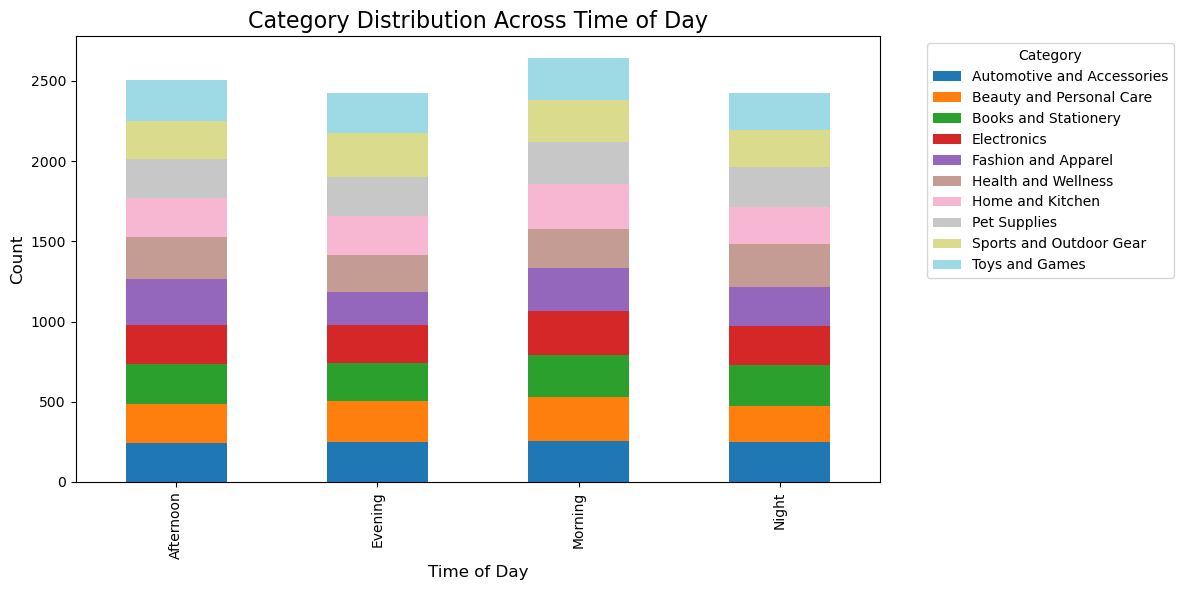

In [20]:
# Group the data by time_of_day and Category
time_category_data = df.groupby(['time_of_day', 'Category']).size().unstack()

# Plotting the bar graph
time_category_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Customizing the plot
plt.title('Category Distribution Across Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


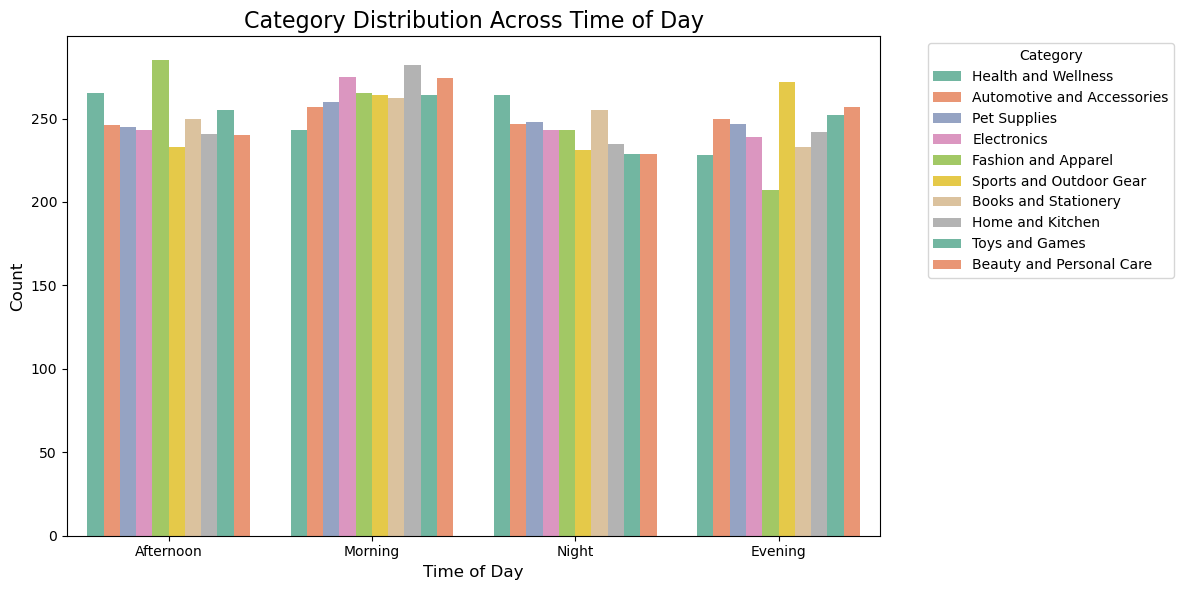

In [21]:
# Plotting the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='time_of_day', hue='Category', palette='Set2')

# Customizing the plot
plt.title('Category Distribution Across Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
df['Category'].value_counts()

Category
Health and Wellness           1000
Automotive and Accessories    1000
Pet Supplies                  1000
Electronics                   1000
Fashion and Apparel           1000
Sports and Outdoor Gear       1000
Books and Stationery          1000
Home and Kitchen              1000
Toys and Games                1000
Beauty and Personal Care      1000
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3104\263217834.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='time_of_day', palette='Set2')


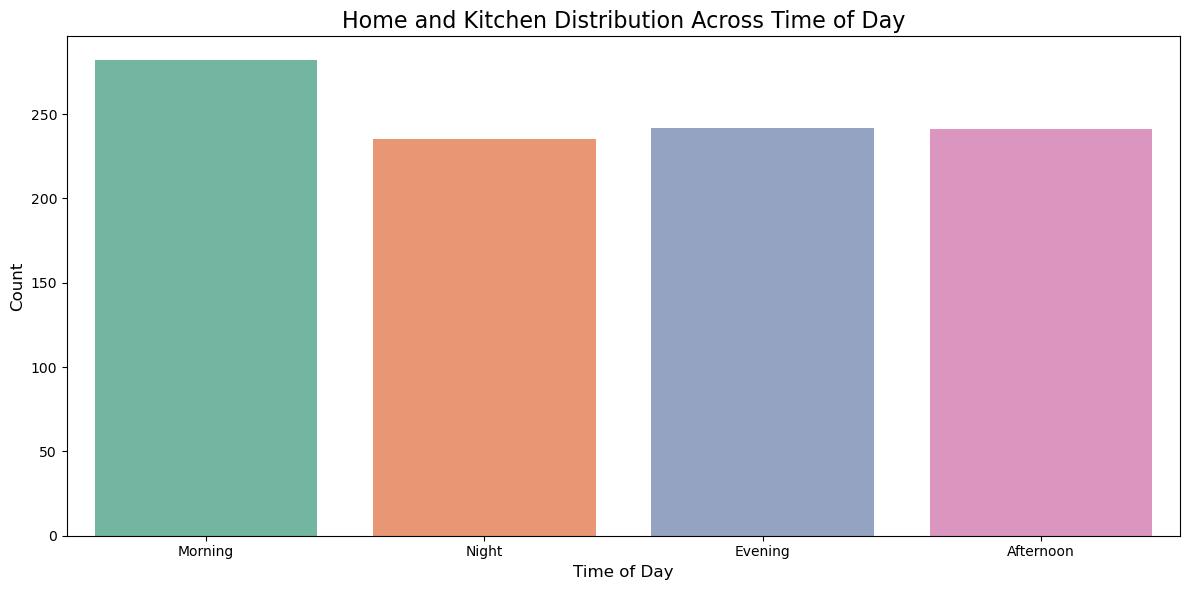

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_category_time_of_day(df, category_value):
    # Filter the DataFrame for the given category value
    filtered_df = df[df['Category'] == category_value]

    # Plotting the countplot for the filtered data
    plt.figure(figsize=(12, 6))
    sns.countplot(data=filtered_df, x='time_of_day', palette='Set2')

    # Customizing the plot
    plt.title(f'{category_value} Distribution Across Time of Day', fontsize=16)
    plt.xlabel('Time of Day', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example of usage
plot_category_time_of_day(df, 'Home and Kitchen')  # Change 'Electronics' to any other category value from the 'Category' column


In [40]:
# Save the DataFrame to a CSV file
df.to_csv('ads_data_final.csv', index=False)